In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,NaN,1.95,2.50,16.8,113,NaN,3.49,NaN,NaN,7.80,0.86,NaN,NaN
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,NaN,2.26,20.0,120,NaN,NaN,0.43,1.35,NaN,0.59,NaN,NaN
176,13.17,NaN,2.37,20.0,120,NaN,NaN,0.53,1.46,NaN,0.60,NaN,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	22
float64		column 2	7
float64		column 3	0
float64		column 4	0
int64		column 5	0
float64		column 6	29
float64		column 7	14
float64		column 8	7
float64		column 9	29
float64		column 10	14
float64		column 11	22
float64		column 12	36
float64		column 13	36


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,156.000000,171.000000,178.000000,178.000000,178.000000,149.000000,164.000000,171.000000,149.000000,164.000000,156.000000,142.000000,142.000000
mean,13.004744,2.332632,2.366517,19.494944,99.741573,2.281477,2.031707,0.362865,1.540872,5.026463,0.955936,2.563803,762.197183
std,0.816409,1.118488,0.274344,3.339564,14.282484,0.634187,0.976509,0.125747,0.542976,2.258284,0.230913,0.706922,314.370772
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,290.000000
25%,12.367500,1.605000,2.210000,17.200000,88.000000,1.740000,1.242500,0.270000,1.150000,3.265000,0.780000,1.852500,516.250000
50%,13.050000,1.860000,2.360000,19.500000,98.000000,2.320000,2.135000,0.340000,1.460000,4.640000,0.960000,2.760000,680.000000
75%,13.672500,3.065000,2.557500,21.500000,107.000000,2.800000,2.892500,0.440000,1.870000,6.200000,1.102500,3.137500,1008.750000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,3.930000,0.660000,3.280000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

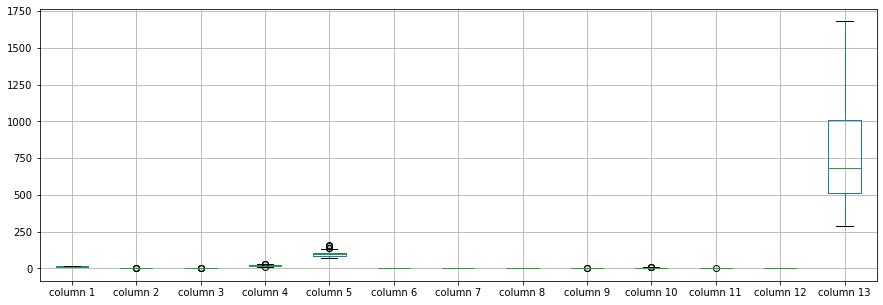

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.004744
column 2       2.332632
column 3       2.366517
column 4      19.494944
column 5      99.741573
column 6       2.281477
column 7       2.031707
column 8       0.362865
column 9       1.540872
column 10      5.026463
column 11      0.955936
column 12      2.563803
column 13    762.197183
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.101973,0.195009,-0.311327,0.230510,0.305481,0.301607,-0.149097,0.214345,0.522575,-0.093545,0.141481,0.611260
column 2,0.101973,1.000000,0.162528,0.288697,-0.091592,-0.354040,-0.409439,0.300459,-0.253354,0.211402,-0.555448,-0.391350,-0.197859
column 3,0.195009,0.162528,1.000000,0.443367,0.286587,0.088533,0.102532,0.172856,0.095907,0.232692,-0.089907,0.005464,0.206666
column 4,-0.311327,0.288697,0.443367,1.000000,-0.083333,-0.385579,-0.415254,0.354092,-0.178372,-0.006737,-0.283648,-0.381918,-0.462739
column 5,0.230510,-0.091592,0.286587,-0.083333,1.000000,0.199472,0.222743,-0.265025,0.214144,0.154118,0.048574,0.107934,0.369254
column 6,0.305481,-0.354040,0.088533,-0.385579,0.199472,1.000000,0.866828,-0.439962,0.605441,-0.024638,0.429961,0.713250,0.536214
column 7,0.301607,-0.409439,0.102532,-0.415254,0.222743,0.866828,1.000000,-0.555974,0.668273,-0.135181,0.540477,0.794545,0.563324
column 8,-0.149097,0.300459,0.172856,0.354092,-0.265025,-0.439962,-0.555974,1.000000,-0.319055,0.121273,-0.259787,-0.516387,-0.299189
column 9,0.214345,-0.253354,0.095907,-0.178372,0.214144,0.605441,0.668273,-0.319055,1.000000,0.029114,0.306550,0.537831,0.383119
column 10,0.522575,0.211402,0.232692,-0.006737,0.154118,-0.024638,-0.135181,0.121273,0.029114,1.000000,-0.555621,-0.392469,0.257863


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+11,13+11+11,13+11+11,13+11+11+11+11,13+11+11+11+11+11,13+11+11+11+11+11+11,13+11+11+11+11+11,13+11+11+11+11,13+11+11+11,13+11+11,13+11,13], vae_layer = False, seed = 110)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 813.1129150390625
Epoch: 1 , loss: 807.4206764914773
Epoch: 2 , loss: 802.0361993963069
Epoch: 3 , loss: 804.3418856534091
Epoch: 4 , loss: 800.2170854048295
Epoch: 5 , loss: 804.5199917879971
Epoch: 6 , loss: 805.0950816761364
Epoch: 7 , loss: 801.6440318714489
Epoch: 8 , loss: 798.4510331587358
Epoch: 9 , loss: 804.759110884233
Epoch: 10 , loss: 796.9192782315341
Epoch: 11 , loss: 799.1804310191761
Epoch: 12 , loss: 803.4246493252841
Epoch: 13 , loss: 802.454306862571
Epoch: 14 , loss: 801.0210182883523
Epoch: 15 , loss: 804.2035966352983
Epoch: 16 , loss: 808.2518643465909
Epoch: 17 , loss: 804.7101717862216
Epoch: 18 , loss: 798.5891057794744
Epoch: 19 , loss: 801.5296020507812
Epoch: 20 , loss: 794.0624389648438
Epoch: 21 , loss: 804.153242631392
Epoch: 22 , loss: 802.9575417258523
Epoch: 23 , loss: 806.7689430930398
Epoch: 24 , loss: 803.387373490767
Epoch: 25 , loss: 801.7984896573154
Epoch: 26 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.000000,0.0,0.0,0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.0,0.0,0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
2,0.000000,0.000000,0.0,0.0,0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
3,-14.342244,0.000000,0.0,0.0,0,-3.822346,0.000000,-0.212427,-2.15246,0.000000,0.0,-3.422390,-1479.972525
4,0.000000,0.000000,0.0,0.0,0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.000000,0.0,0.0,0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
174,0.000000,0.000000,0.0,0.0,0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
175,0.000000,-4.253873,0.0,0.0,0,-1.563869,-0.663906,0.000000,0.00000,-10.173761,0.0,-1.533949,-834.974059
176,0.000000,-2.564979,0.0,0.0,0,-1.625004,-0.655027,0.000000,0.00000,-9.275087,0.0,-1.595046,-839.975168


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(4519.337592128544, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.4146912491424971

In [18]:
new_df.iloc[66,:]

column 1     13.110000
column 2      1.010000
column 3      1.700000
column 4     15.000000
column 5     78.000000
column 6      2.980000
column 7      0.021239
column 8      0.260000
column 9      0.021251
column 10     0.021266
column 11     0.021266
column 12     0.021253
column 13     0.021127
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.230000,1.710000,2.43,15.6,127,2.800000,3.060000,0.280000,2.29000,5.640000,1.04,3.920000,1065.000000
1,13.200000,1.780000,2.14,11.2,100,2.650000,2.760000,0.260000,1.28000,4.380000,1.05,3.400000,1050.000000
2,13.160000,2.360000,2.67,18.6,101,2.800000,3.240000,0.300000,2.81000,5.680000,1.03,3.170000,1185.000000
3,0.027756,1.950000,2.50,16.8,113,0.027654,3.490000,0.027573,0.02754,7.800000,0.86,0.027610,0.027475
4,13.240000,2.590000,2.87,21.0,118,2.800000,2.690000,0.390000,1.82000,4.320000,1.04,2.930000,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.650000,2.45,20.5,95,1.680000,0.610000,0.520000,1.06000,7.700000,0.64,1.740000,740.000000
174,13.400000,3.910000,2.48,23.0,102,1.800000,0.750000,0.430000,1.41000,7.300000,0.70,1.560000,750.000000
175,13.270000,0.026127,2.26,20.0,120,0.026131,0.026094,0.430000,1.35000,0.026239,0.59,0.026051,0.025941
176,13.170000,0.025021,2.37,20.0,120,0.024996,0.024973,0.530000,1.46000,0.024913,0.60,0.024954,0.024832


In [20]:
imputations[-1].to_excel("Wine_AL_10(imp).xlsx", index=False, header=False)